In [1]:
import pandas as pd
import numpy as np
from openai import AzureOpenAI
import json
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter
import ast

client = AzureOpenAI(
    api_key="b0f92af221a34bd5990340f1a3267ff2",
    api_version="2023-05-15",
    azure_endpoint = "https://dirogpt4.openai.azure.com/"
    )
deployment_name = "dirogpt8knov2023"

In [2]:
def format_conversation(convo_df):
    conversation = [{
        "person1" : convo_df["question"].iloc[0],
        "person2" : convo_df["answer"].iloc[0]
    }]
    i = 1
    while i < len(convo_df)-1:
        convo_format = {
            "person1" : convo_df["answer"].iloc[i],
            "person2" : convo_df["answer"].iloc[i+1]
        }
        i+=2
        conversation.append(convo_format)
    return conversation

In [3]:
def make_manipulate_chat(chat,manipulation_type):
    messages = [
        {
            "role": "system",
            "content": f"Provide JSON with two keys 'conversation' and 'words' I will provide with a conversation of 2 people and convert the simple conversation of the 2 people to a manipulation conversation where the manipulation should be of type {manipulation_type}. Remember these rules 1. Always give the same JSON as i provided you with earlier in the key 'conversation' and another key 'words' which will be list of words which will highlight the words in the conversation which signify that manipulation technique and make sure to include words and phrasees max upto 3 words."
        },
        {
            "role" : "user",
            "content" : str(chat)
        }
    ]
    response = client.chat.completions.create(model=deployment_name, messages=messages)
    try:
        text = eval(response.choices[0].message.content)
    except:
        print("FAILED DICT CONVERSION TRYING AGAIN......")
        return make_manipulate_chat(chat,manipulation_type)
    return text

In [58]:
with open('dataset_created.json', 'r') as json_file:
    dataset = json.loads(json_file.read())

dataset

[{'conversation': [{'person1': 'hear what?',
    'person2': 'debrah just delivered her baby.'},
   {'person1': 'OH, is that so?', 'person2': 'yes, I thought you knew.'},
   {'person1': "i didn't.", 'person2': 'she was 8 pounds 6 ounces.'},
   {'person1': "that's nice.", 'person2': "aren't you going to visit her?"},
   {'person1': 'I will, in time.',
    'person2': 'thought to share the good news with you.'},
   {'person1': 'thanks.',
    'person2': 'I wonder, why no one reached out to you.'},
   {'person1': 'guess it slipped off.', 'person2': "okay, that's weird."},
   {'person1': 'anyways, congrats are due.', 'person2': 'indeed it is .'},
   {'person1': 'she must be beautiful.',
    'person2': 'very much indeed, she was an adorable baby.'}],
  'words': ['hear what?',
   'is that so?',
   "that's nice.",
   'I will, in time.',
   'thanks.',
   'guess it slipped off.',
   "that's weird.",
   'anyways',
   'very much indeed'],
  'manipulation_present': True,
  'manipulation_type': 'GHOST

In [59]:
df = pd.read_csv("Conversation.csv")
df.drop(columns=df.columns[0],axis = 0,inplace = True)
df.head()

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [60]:
num_rows = df.shape[0]
max_start = num_rows - 50
manipulation_types = ["GHOSTING", "GASLIGHTING", "LOVE BOMBING", "DENIAL", "FLATTERY"]

In [61]:
# Code for creating a fixed convo for all data types

# for mp_type in manipulation_types:
#     print("Executing Manipulation Type : ",mp_type)
#     for i in range(2):
#         print(mp_type," dataset making : ",i)
#         start_index = np.random.randint(0, max_start)
#         random_rows = df.iloc[start_index:start_index + (np.random.randint(10, 31, size=1)[0])]
#         chat = format_conversation(random_rows)
#         manipulated_chat = make_manipulate_chat(chat, mp_type)
#         manipulated_chat["manipulation_present"] = True
#         manipulated_chat["manipulation_type"] = mp_type
#         dataset.append(manipulated_chat)
#         print(manipulated_chat)
#         print("\n\n")
    

In [64]:
# Generate Convo of Random Data types

num_conversations = 30
for _ in range(num_conversations):
    # Select a random manipulation type
    mp_type = random.choice(manipulation_types)

    print("Executing Manipulation Type:", mp_type)

    start_index = np.random.randint(0, max_start)
    random_rows = df.iloc[start_index:start_index + (np.random.randint(10, 31, size=1)[0])]
    chat = format_conversation(random_rows)

    try:
      manipulated_chat = make_manipulate_chat(chat, mp_type)
      manipulated_chat["manipulation_present"] = True
      manipulated_chat["manipulation_type"] = mp_type
      dataset.append(manipulated_chat)
      print(manipulated_chat)
    except Exception as e:
      print(f"Error encountered while manipulating conversation with type {mp_type}: {e}")
      print("Skipping this conversation and continuing...")

    print("\n\n")

Executing Manipulation Type: FLATTERY
{'conversation': [{'person1': 'A good story is more important than color, you are wise in that aspect.', 'person2': "Actors didn't curse back then."}, {'person1': 'And there was no violence, you have a sound understanding of that era.', 'person2': "People today don't like that."}, {'person1': 'No, today people like lots of action. You are unique in liking a good story.', 'person2': 'I like a good story.'}, {'person1': 'I like to see actors who are like real people, a refined taste like yours.', 'person2': 'Like real people with real problems.'}, {'person1': "They still make movies like that, but it's in rare discerning audience like you.", 'person2': 'Yes, but they never make much money.'}, {'person1': 'Yes, everybody gets the public broadcasting system. You have a profound understanding.', 'person2': 'It puts me to sleep.'}, {'person1': 'Tell me about it. You have such interesting and nuanced views.', 'person2': 'A gardening show follows a knittin

In [20]:
print("Getting Normal Convo")
for i in range(5):
    start_index = np.random.randint(0, max_start)
    random_rows = df.iloc[start_index:start_index + (np.random.randint(10, 31, size=1)[0])]
    chat = format_conversation(random_rows)
    manipulated_chat = {}
    manipulated_chat["conversation"] = chat
    manipulated_chat["words"] = []
    manipulated_chat["manipulation_present"] = False
    manipulated_chat["manipulation_type"] = "No_Manipulation"
    dataset.append(manipulated_chat)
    print(manipulated_chat)
    print("\n\n")
    

Getting Normal Convo
{'conversation': [{'person1': "i think i'll make a sandwich.", 'person2': 'what kind?'}, {'person1': 'a ham sandwich.', 'person2': 'the bread is in the cabinet.'}, {'person1': "where's the mustard?", 'person2': "it's in the fridge, i think."}, {'person1': 'oh, yes, here it is. do you want a sandwich?', 'person2': 'yes, that sounds nice.'}, {'person1': 'how about some potato chips?', 'person2': 'yes. and a pickle, if we have any.'}, {'person1': "but, mom, i'm not dirty.", 'person2': 'you need a bath every day.'}, {'person1': 'why?', 'person2': "because you don't want to smell bad."}, {'person1': "i don't smell bad.", 'person2': "that's what you think."}, {'person1': 'if i smelled bad, i could smell me.', 'person2': 'i can smell you.'}], 'words': [], 'manipulation_present': False, 'manipulation_type': None}



{'conversation': [{'person1': 'what should our flag look like?', 'person2': 'it should have a pretty woman on it.'}, {'person1': "that's ridiculous!", 'person2

In [54]:
np.random.randint(10, 31, size=1)[0]

23

In [65]:
len(dataset)

55

In [74]:
with open('dataset_created.json', 'w') as json_file:
  # Use json.dump to write the dictionary to the file
  json.dump(dataset, json_file)

In [67]:
df_convo = pd.read_json('dataset_created.json')
df_convo

,conversation,words,manipulation_present,manipulation_type
0,"[{'person1': 'hear what?', 'person2': 'debrah ...","[hear what?, is that so?, that's nice., I will...",True,GHOSTING
1,"[{'person1': 'then i did my laundry.', 'person...",[],True,GHOSTING
2,[{'person1': 'did you remember to look at the ...,"[are you sure?, you remember, how could you fo...",True,GASLIGHTING
3,"[{'person1': 'don't pick your nose.', 'person2...",[i think i know your behavior better than you ...,True,GASLIGHTING
4,[{'person1': 'it seems like i get a new pimple...,"[Oh darling, beauty, admirable, sweetheart, pe...",True,LOVE BOMBING
5,[{'person1': 'he's the only candidate that I t...,"[beacon of hope, fall in love, seeds of trust,...",True,LOVE BOMBING
6,"[{'person1': 'My favorite movie is Superbad.',...","[don't recall, I don't think so., I don't have...",True,DENIAL
7,[{'person1': 'it's only 10 minutes from here.'...,"[of course not. It is never crowded., Practica...",True,DENIAL
8,[{'person1': 'we must be here for some reason....,"[extraordinary ability, mind of a genius, char...",True,FLATTERY
9,[{'person1': 'Wow! Your car really looks stunn...,"[stunning, amazing movie, Impressive!, fantast...",True,FLATTERY


In [108]:
print(df_convo["conversation"].iloc[3],"\n\n")
print(df_convo["words"].iloc[3])

[{'person1': "don't pick your nose.", 'person2': "i wasn't picking my nose."}, {'person1': 'what were you doing?', 'person2': 'i was scratching my nose.'}, {'person1': 'i think i know your behavior better than you do.', 'person2': 'okay, mom, maybe i was picking it a little bit.'}, {'person1': 'stop lying. use a tissue next time.', 'person2': "i didn't have a tissue."}, {'person1': 'you always have excuses! you should have waited till you find a tissue.', 'person2': "i couldn't wait. it was an emergency."}, {'person1': "oh, an 'emergency?', Really? maybe you should have called 911 if your nose-picking constituted as an emergency.", 'person2': "it wasn't that kind of emergency."}, {'person1': 'stop lying. I know your tricks!', 'person2': "i'm going to clean it."}, {'person1': "don't use water on it! You're going to break it.", 'person2': "i'll use a damp cloth."}, {'person1': "don't let water get into any of the cracks. You're clueless about how to handle things.", 'person2': "i'll sque

In [77]:
df_convo['conversation_length'] = np.where(pd.notna(df_convo['conversation']), df_convo['conversation'].apply(len), None)


In [78]:
df_convo.describe()

,conversation,words,manipulation_present,manipulation_type,conversation_length
count,55,55,55,55,55
unique,55,51,2,6,12
top,"[{'person1': 'hear what?', 'person2': 'debrah ...",[],True,GASLIGHTING,9
freq,1,5,50,12,22


In [69]:
df_convo["manipulation_type"] = df_convo["manipulation_type"].fillna("No_Manipulation")

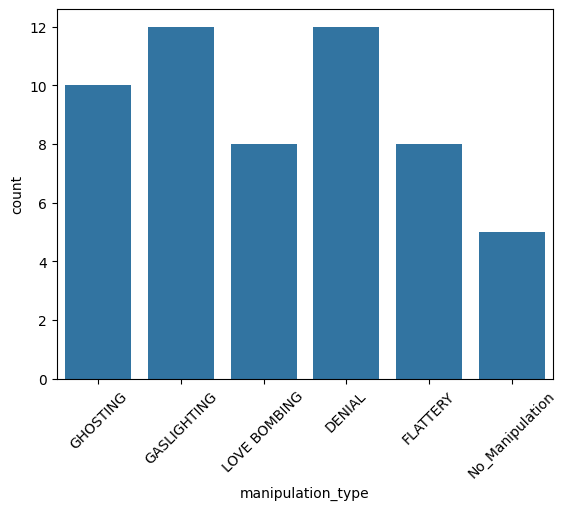

<Figure size 1000x600 with 0 Axes>

In [79]:

sns.countplot(x="manipulation_type", data=df_convo)

# Increase the rotation of x-axis labels to prevent overlapping text
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Optionally, increase figure size for better readability
plt.figure(figsize=(10, 6))  # Adjust width and height as desired

plt.show()

In [80]:
df_convo.isnull().sum()

conversation            0
words                   0
manipulation_present    0
manipulation_type       0
conversation_length     0
dtype: int64

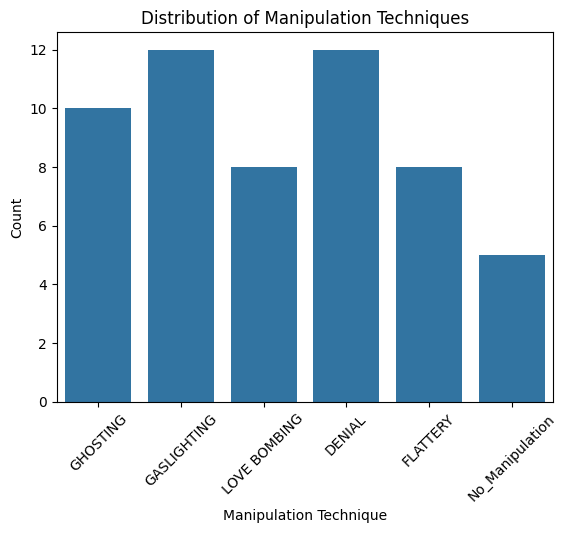

In [82]:
# Categorical Feature Analysis (Bar chart)
sns.countplot(x="manipulation_type", data=df_convo)
plt.xlabel('Manipulation Technique')
plt.ylabel('Count')
plt.title('Distribution of Manipulation Techniques')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

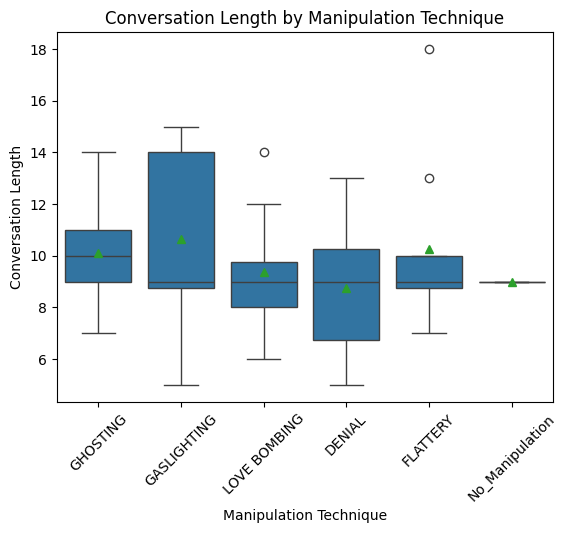

In [81]:
# Bivariate Analysis (Box plots)
# Assuming 'manipulation_type' is categorical and 'conversation_length' is numerical
sns.boxplot(
    x = "manipulation_type",
    y = "conversation_length",
    showmeans=True,
    data=df_convo
)
plt.xlabel('Manipulation Technique')
plt.ylabel('Conversation Length')
plt.title('Conversation Length by Manipulation Technique')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

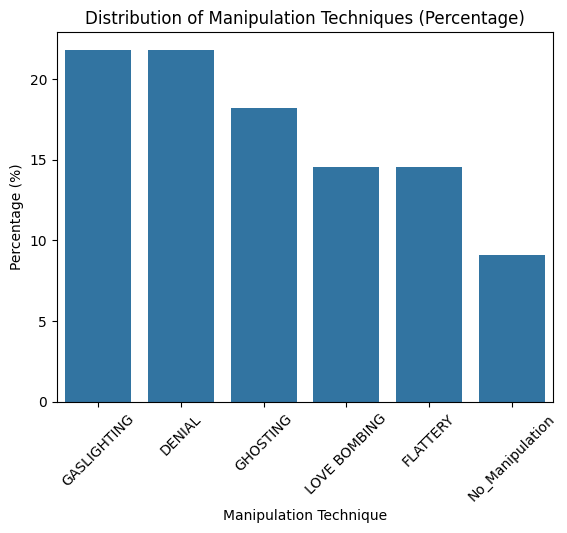

In [84]:
# Calculate total number of conversations
total_conversations = len(df_convo)

# Create a new DataFrame to store percentages
manipulation_percentages = (df_convo['manipulation_type'].value_counts() / total_conversations) * 100

# Plot the percentage distribution
sns.barplot(x=manipulation_percentages.index, y=manipulation_percentages.values)
plt.xlabel('Manipulation Technique')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Manipulation Techniques (Percentage)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [86]:
df_convo

,conversation,words,manipulation_present,manipulation_type,conversation_length
0,"[{'person1': 'hear what?', 'person2': 'debrah ...","[hear what?, is that so?, that's nice., I will...",True,GHOSTING,9
1,"[{'person1': 'then i did my laundry.', 'person...",[],True,GHOSTING,9
2,[{'person1': 'did you remember to look at the ...,"[are you sure?, you remember, how could you fo...",True,GASLIGHTING,9
3,"[{'person1': 'don't pick your nose.', 'person2...",[i think i know your behavior better than you ...,True,GASLIGHTING,9
4,[{'person1': 'it seems like i get a new pimple...,"[Oh darling, beauty, admirable, sweetheart, pe...",True,LOVE BOMBING,9
5,[{'person1': 'he's the only candidate that I t...,"[beacon of hope, fall in love, seeds of trust,...",True,LOVE BOMBING,9
6,"[{'person1': 'My favorite movie is Superbad.',...","[don't recall, I don't think so., I don't have...",True,DENIAL,10
7,[{'person1': 'it's only 10 minutes from here.'...,"[of course not. It is never crowded., Practica...",True,DENIAL,9
8,[{'person1': 'we must be here for some reason....,"[extraordinary ability, mind of a genius, char...",True,FLATTERY,9
9,[{'person1': 'Wow! Your car really looks stunn...,"[stunning, amazing movie, Impressive!, fantast...",True,FLATTERY,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   conversation          55 non-null     object
 1   words                 55 non-null     object
 2   manipulation_present  55 non-null     bool  
 3   manipulation_type     55 non-null     object
 4   conversation_length   55 non-null     object
dtypes: bool(1), object(4)
memory usage: 1.9+ KB
Basic info of dataframe None
Missing Values in Database :  conversation            0
words                   0
manipulation_present    0
manipulation_type       0
conversation_length     0
dtype: int64


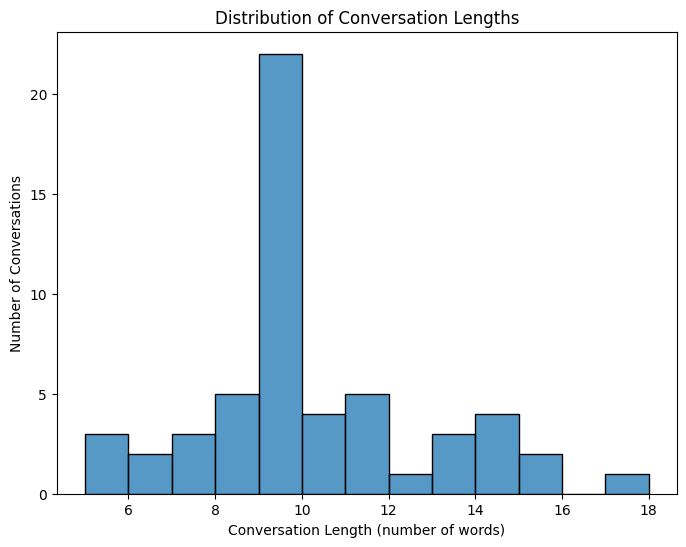

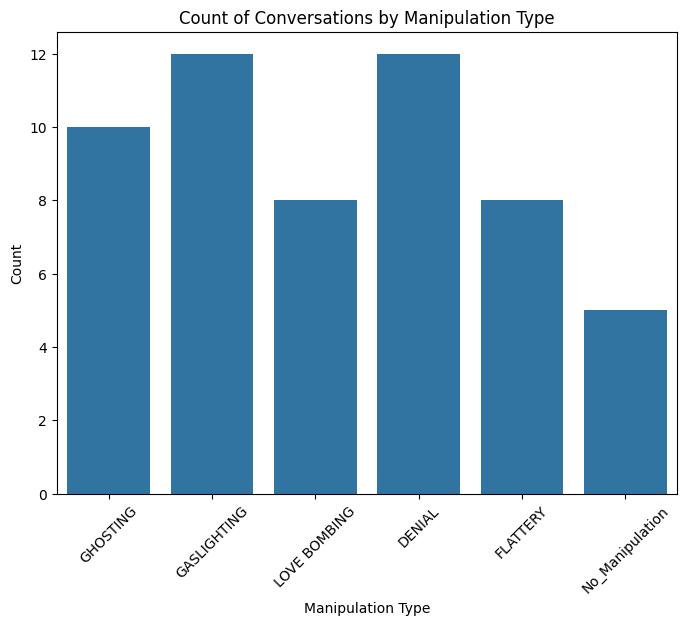

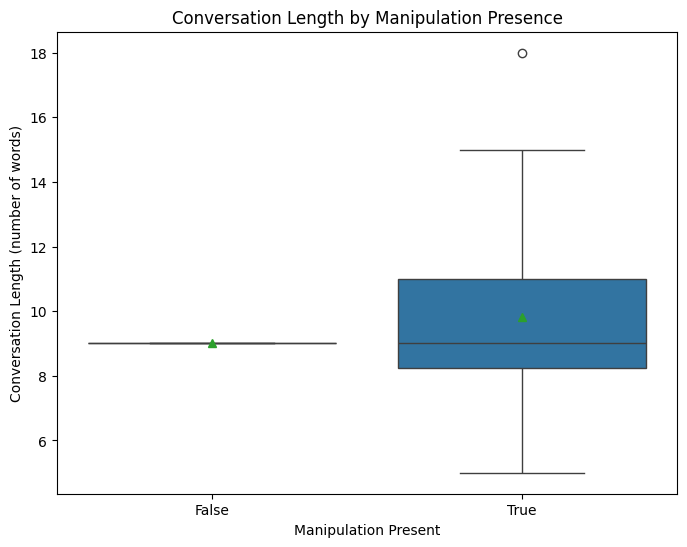

TypeError: sequence item 0: expected str instance, dict found

In [89]:
# Get some basic info
print("Basic info of dataframe",df_convo.info())

# Check for missing values
print("Missing Values in Database : ",df_convo.isnull().sum())

# Distribution of conversation lengths
plt.figure(figsize=(8, 6))
sns.histplot(data=df_convo, x="conversation_length")
plt.xlabel("Conversation Length (number of words)")
plt.ylabel("Number of Conversations")
plt.title("Distribution of Conversation Lengths")
plt.show()

# Manipulation types by count
plt.figure(figsize=(8, 6))
sns.countplot(x="manipulation_type", data=df_convo)
plt.xlabel("Manipulation Type")
plt.ylabel("Count")
plt.title("Count of Conversations by Manipulation Type")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

# Presence of manipulation vs conversation length
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="manipulation_present", y="conversation_length", showmeans=True, data=df_convo
)
plt.xlabel("Manipulation Present")
plt.ylabel("Conversation Length (number of words)")
plt.title("Conversation Length by Manipulation Presence")
plt.show()

# Heatmap of word co-occurrence for manipulation conversations
manipulation_df = df_convo[df_convo["manipulation_present"] == True]
manipulation_words = " ".join(manipulation_df["conversation"].sum())
word_counts = manipulation_words.split()
from collections import Counter
word_counter = Counter(word_counts)
common_words = word_counter.most_common(20)

stopwords = ["i", "you", "a", "the", "is", "of", "to", "in", "and", "or", "my", "on", "at", "it"]
common_words = [word for word, count in common_words if word not in stopwords]

df_cooccurrence = pd.DataFrame(columns=common_words)
for word in common_words:
    df_cooccurrence[word] = [
        word_counts.count(co) for co in common_words if co != word
    ]

plt.figure(figsize=(10, 10))
sns.heatmap(df_cooccurrence, annot=True)
plt.xlabel("Co-occurring Words")
plt.ylabel("Co-occurring Words")
plt.title("Heatmap of Word Co-occurrence (Manipulation Conversations)")
plt.show()

# Average conversation length by manipulation type
manipulation_type_lengths = df_convo.groupby("manipulation_type")["conversation_length"].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=manipulation_type_lengths.index, y=manipulation_type_lengths.values)
plt.xlabel("Manipulation Type")
plt.ylabel("Average Conversation Length (words)")
plt.title("Average Conversation Length by Manipulation Type")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

/var/folders/80/4hz711k57kx3wjbl8l_0vpxc0000gn/T/ipykernel_40023/3747202265.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/80/4hz711k57kx3wjbl8l_0vpxc0000gn/T/ipykernel_40023/3747202265.py:12: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.barplot(


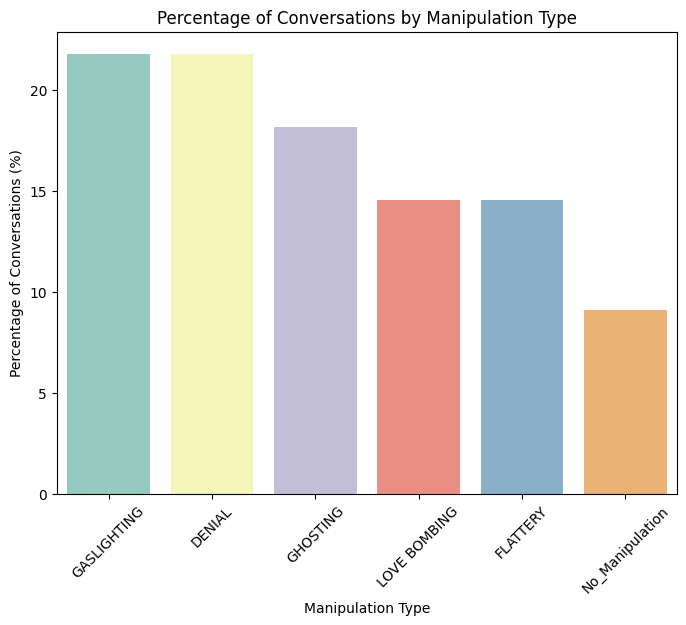

In [94]:
total_conversations = len(df_convo)

# Percentage of conversations by manipulation type
manipulation_type_counts = df_convo["manipulation_type"].value_counts().sort_values(ascending=False)
manipulation_percentages = (manipulation_type_counts / total_conversations) * 100

# Define a color palette
palette = sns.color_palette("Set3")  # Choose any color palette from seaborn

# Plot manipulation type percentages with colors
plt.figure(figsize=(8, 6))
sns.barplot(
    x=manipulation_percentages.index,
    y=manipulation_percentages.values,
    palette=palette,
)
plt.xlabel("Manipulation Type")
plt.ylabel("Percentage of Conversations (%)")
plt.title("Percentage of Conversations by Manipulation Type")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [103]:
df_convo.to_excel("manipulation_dataset_extracted.xlsx",index=False)

In [2]:
df = pd.read_csv("manipulation_dataset_extracted.csv")
df.head(30)

,conversation,words,manipulation_present,manipulation_type,conversation_length
0,"[{'person1': 'hear what?', 'person2': 'debrah ...","['hear what?', 'is that so?', ""that's nice."", ...",True,GHOSTING,9
1,"[{'person1': 'then i did my laundry.', 'person...",[''],True,GHOSTING,9
2,"[{'person1': ""did you remember to look at the ...","['are you sure?', 'you remember', 'how could y...",True,GASLIGHTING,9
3,"[{'person1': ""don't pick your nose."", 'person2...",['i think i know your behavior better than you...,True,GASLIGHTING,9
4,[{'person1': 'it seems like i get a new pimple...,"['Oh darling', 'beauty', 'admirable', 'sweethe...",True,LOVE BOMBING,9
5,"[{'person1': ""he's the only candidate that I t...","['beacon of hope', 'fall in love', 'seeds of t...",True,LOVE BOMBING,9
6,"[{'person1': 'My favorite movie is Superbad.',...","[""don't recall"", ""I don't think so."", ""I don't...",True,DENIAL,10
7,"[{'person1': ""it's only 10 minutes from here.""...","['of course not. It is never crowded.', 'Pract...",True,DENIAL,9
8,[{'person1': 'we must be here for some reason....,"['extraordinary ability', 'mind of a genius', ...",True,FLATTERY,9
9,[{'person1': 'Wow! Your car really looks stunn...,"['stunning', 'amazing movie', 'Impressive!', '...",True,FLATTERY,9


In [3]:
manipulation_words = {
    "GHOSTING" : {},
    "GASLIGHTING" : {},
    "LOVE BOMBING" : {},
    "DENIAL" : {},
    "FLATTERY" : {},
}

total_word_count = {
    "GHOSTING" : 0,
    "GASLIGHTING" : 0,
    "LOVE BOMBING" : 0,
    "DENIAL" : 0,
    "FLATTERY" : 0,
}

In [4]:
for i in range(len(df)):
    curr_words = df["words"].iloc[i]
    manipulation_type = df["manipulation_type"].iloc[i]
    manipulation_present  = df["manipulation_present"].iloc[i]
    curr_words = ast.literal_eval(curr_words)
    if manipulation_present:
        for wd in curr_words:
            if wd in manipulation_words[manipulation_type].keys():
                manipulation_words[manipulation_type][wd] += 1
            else:
                manipulation_words[manipulation_type][wd] = 1
            total_word_count[manipulation_type] += 1

In [5]:
manipulation_words

{'GHOSTING': {'hear what?': 1,
  'is that so?': 1,
  "that's nice.": 1,
  'I will, in time.': 1,
  'thanks.': 1,
  'guess it slipped off.': 1,
  "that's weird.": 1,
  'anyways': 1,
  'very much indeed': 1,
  '': 3,
  "i'm going to call you soon": 1,
  'see you soon': 1,
  'until next time': 1,
  'No response': 1,
  'I will tell you later': 1,
  '...': 3,
  'have a nice day': 1,
  'what are you talking about': 1,
  'no response': 1,
  'what happened?': 1,
  'if someone moves out': 1,
  'avoid thinking': 1,
  "don't worry": 1,
  'I assure you': 1,
  "i just really don't want to go": 1,
  'sounds like a plan': 1,
  'do you think you can come': 1},
 'GASLIGHTING': {'are you sure?': 1,
  'you remember': 1,
  'how could you forget': 1,
  'doubting your memory now?': 1,
  'being strange': 1,
  "You're even forgetting": 1,
  'i think i know your behavior better than you do.': 1,
  'stop lying.': 1,
  'you always have excuses!': 1,
  'stop lying. I know your tricks!': 1,
  "You're clueless abou

In [6]:
total_word_count

{'GHOSTING': 31,
 'GASLIGHTING': 107,
 'LOVE BOMBING': 75,
 'DENIAL': 73,
 'FLATTERY': 79}

In [7]:
# Creating dataframes
df_ghosting = pd.DataFrame(list(manipulation_words['GHOSTING'].items()), columns=['Phrase', 'Count'])
df_gaslighting = pd.DataFrame(list(manipulation_words['GASLIGHTING'].items()), columns=['Phrase', 'Count'])
df_love_bombing = pd.DataFrame(list(manipulation_words['LOVE BOMBING'].items()), columns=['Phrase', 'Count'])
df_denial = pd.DataFrame(list(manipulation_words['DENIAL'].items()), columns=['Phrase', 'Count'])

# Combine all dataframes into one with a new column for the category
df_ghosting['Category'] = 'GHOSTING'
df_gaslighting['Category'] = 'GASLIGHTING'
df_love_bombing['Category'] = 'LOVE BOMBING'
df_denial['Category'] = 'DENIAL'

df_combined = pd.concat([df_ghosting, df_gaslighting, df_love_bombing, df_denial])

# Resetting the index
df_combined.reset_index(drop=True, inplace=True)

# Analyze the data
# Count of phrases per category
phrase_count_per_category = df_combined.groupby('Category').size()

# Count of unique phrases per category
unique_phrase_count_per_category = df_combined.groupby('Category')['Phrase'].nunique()

# Most common phrases across all categories
most_common_phrases = df_combined['Phrase'].value_counts().head(10)

# Output analysis results
print("Phrase Count Per Category:\n", phrase_count_per_category)
print("\nUnique Phrase Count Per Category:\n", unique_phrase_count_per_category)
print("\nMost Common Phrases Across All Categories:\n", most_common_phrases)

Phrase Count Per Category:
 Category
DENIAL           72
GASLIGHTING     106
GHOSTING         27
LOVE BOMBING     73
dtype: int64

Unique Phrase Count Per Category:
 Category
DENIAL           72
GASLIGHTING     106
GHOSTING         27
LOVE BOMBING     73
Name: Phrase, dtype: int64

Most Common Phrases Across All Categories:
 Phrase
hear what?            1
our special spot      1
you always come up    1
great mindset         1
you always outdo      1
you're amazing        1
our little world      1
perfect spot          1
deep connection       1
special bond          1
Name: count, dtype: int64


In [53]:
df_combined.head(20)

,Phrase,Count,Category
0,hear what?,1,GHOSTING
1,is that so?,1,GHOSTING
2,that's nice.,1,GHOSTING
3,"I will, in time.",1,GHOSTING
4,thanks.,1,GHOSTING
5,guess it slipped off.,1,GHOSTING
6,that's weird.,1,GHOSTING
7,anyways,1,GHOSTING
8,very much indeed,1,GHOSTING
9,,3,GHOSTING


In [8]:
df_combined.to_csv('manipulation_phrases_analysis.csv', index=False)